<a href="https://colab.research.google.com/github/msboralugoda/Pattern-Recognition/blob/main/EN3150_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Linear regression impact on outliers


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given Data
x = np.array([0,1,2,3,4,5,6,7,8,9], dtype=float)
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03], dtype=float)


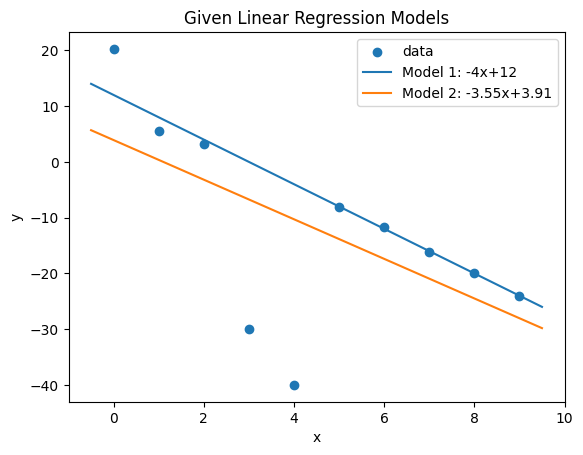

In [6]:
plt.scatter(x, y, label="data")

# Given two models
def m1(x): return -4*x + 12
def m2(x): return -3.55*x + 3.91
# Plot the given models
plt.plot(xs, m1(xs), label="Model 1: -4x+12")
plt.plot(xs, m2(xs), label="Model 2: -3.55x+3.91")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.title("Given Linear Regression Models")
plt.show()

In [7]:
import numpy as np

def robust_loss(y_true, y_pred, beta):
    r2 = (y_true - y_pred)**2
    return np.mean(r2 / (r2 + beta**2))

betas = [1.0, 1e-6, 1e3]
yhat_m1 = m1(x)
yhat_m2 = m2(x)

for beta in betas:
    L1 = robust_loss(y, yhat_m1, beta)
    L2 = robust_loss(y, yhat_m2, beta)
    print(f"beta={beta:g} | L(Model1)={L1:.6f}  L(Model2)={L2:.6f}")


beta=1 | L(Model1)=0.435416  L(Model2)=0.972847
beta=1e-06 | L(Model1)=1.000000  L(Model2)=1.000000
beta=1000 | L(Model1)=0.000227  L(Model2)=0.000188
